<a href="https://colab.research.google.com/github/amitgal21/Final_Project/blob/main/Stage1Complete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')




Mounted at /content/drive


In [ ]:
# Import necessary libraries
import numpy as np
import os
from PIL import Image
from sklearn.model_selection import train_test_split

# Paths to your datasets
train_path_purple = '/content/drive/My Drive/Part_B/DataSet_Stage1/Purple_Bacteria'
train_path_red = '/content/drive/My Drive/Part_B/DataSet_Stage1/Red_Bacteria'
#train_path_purple = '/content/drive/My Drive/Part_B/DataSet_Stage1/purple_test'
#train_path_red = '/content/drive/My Drive/Part_B/DataSet_Stage1/red_test'

# Function to load TIFF images from a folder
def load_tiff_images_from_folder(folder, label):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        if img_path.lower().endswith('.tif'):
            img = Image.open(img_path)
            img = img.resize((227, 227))
            img = np.array(img)
            if img.ndim == 2:  # Convert grayscale to RGB
                img = np.stack((img,)*3, axis=-1)
            img = img / 255.0
            images.append(img)
            labels.append(label)
    return images, labels

# Load and label images
purple_images, purple_labels = load_tiff_images_from_folder(train_path_purple, 0)
print('i finish with Purple')
red_images, red_labels = load_tiff_images_from_folder(train_path_red, 1)
print('i finish with Red')

# Combine datasets
all_images = purple_images + red_images
all_labels = purple_labels + red_labels

# Convert lists to numpy arrays
train_images = np.array(all_images)
train_labels = np.array(all_labels)

# Split dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)
#print(X_train, X_val, y_train, y_val)
# Continue with your model definition, compilation, training, and saving as previously


Finished with Purple
Finished with Red


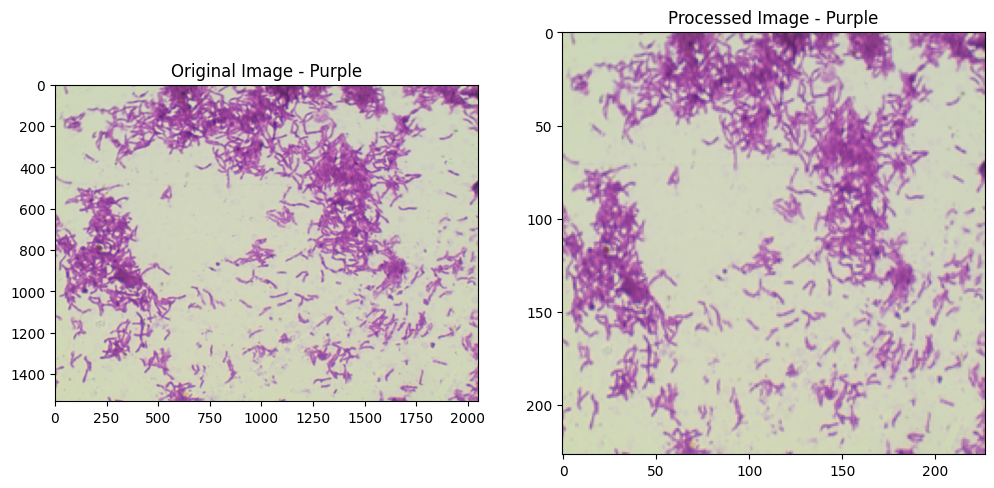

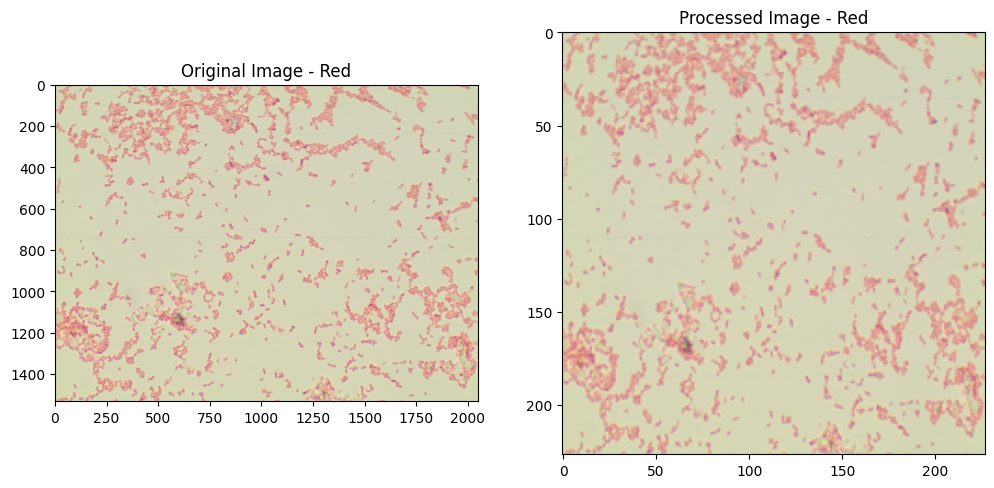

In [ ]:
# Import necessary libraries
import numpy as np
import os
from PIL import Image
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Paths to your datasets
train_path_purple = '/content/drive/My Drive/Part_B/DataSet_Stage1/Purple_Bacteria'
train_path_red = '/content/drive/My Drive/Part_B/DataSet_Stage1/Red_Bacteria'

# Function to load TIFF images from a folder
def load_tiff_images_from_folder(folder, label):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        if img_path.lower().endswith('.tif'):
            img = Image.open(img_path)
            img = preprocess_image(img)
            images.append(img)
            labels.append(label)
    return images, labels

# Function to preprocess image
def preprocess_image(img):
    img = img.resize((227, 227))
    img = np.array(img)
    if img.ndim == 2:  # Convert grayscale to RGB
        img = np.stack((img,)*3, axis=-1)
    img = img / 255.0
    return img

# Function to display image before and after preprocessing
def display_before_after(folder, label, sample_index=0):
    img_paths = [os.path.join(folder, f) for f in os.listdir(folder) if f.lower().endswith('.tif')]
    if len(img_paths) > sample_index:
        img_path = img_paths[sample_index]
        original_img = Image.open(img_path)
        processed_img = preprocess_image(original_img)

        plt.figure(figsize=(12, 6))
        plt.subplot(1, 2, 1)
        plt.imshow(original_img)
        plt.title(f'Original Image - {label}')

        plt.subplot(1, 2, 2)
        plt.imshow(processed_img)
        plt.title(f'Processed Image - {label}')

        plt.show()

# Load and label images
purple_images, purple_labels = load_tiff_images_from_folder(train_path_purple, 0)
print('Finished with Purple')
red_images, red_labels = load_tiff_images_from_folder(train_path_red, 1)
print('Finished with Red')

# Combine datasets
all_images = purple_images + red_images
all_labels = purple_labels + red_labels

# Convert lists to numpy arrays
train_images = np.array(all_images)
train_labels = np.array(all_labels)

# Split dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

# Display example images before and after preprocessing
display_before_after(train_path_purple, 'Purple', sample_index=0)
display_before_after(train_path_red, 'Red', sample_index=0)

# Here you can continue with your model definition, compilation, training, and saving as previously


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.preprocessing.image import ImageDataGenerator

# Model Definition
model = Sequential()

# 1st Conv Layer
model.add(Conv2D(filters=96, kernel_size=(11, 11), strides=(4, 4), activation='relu', input_shape=(227, 227, 3)))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

# 2nd Conv Layer
model.add(Conv2D(filters=256, kernel_size=(5, 5), strides=(1, 1), activation='relu', padding="same"))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

# Remaining Conv Layers
model.add(Conv2D(filters=384, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding="same"))
model.add(Conv2D(filters=384, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding="same"))
model.add(Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding="same"))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

# Flattening and Full Connection
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))

# Last layer for binary classification
model.add(Dense(1, activation='sigmoid'))

# Compile model for binary classification
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Data Augmentation
data_gen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

# Prepare the data generators
train_gen = data_gen.flow(X_train, y_train, batch_size=batch_size)
val_gen = data_gen.flow(X_val, y_val, batch_size=batch_size)

# Model Training with Data Augmentation
num_epochs = 20  # Increased epochs
model.fit(train_gen, epochs=num_epochs, validation_data=val_gen, steps_per_epoch=len(X_train)//batch_size, validation_steps=len(X_val)//batch_size)

# Save the trained model
model.save('/content/drive/My Drive/trained_model2.h5')


In [ ]:
# Step 3.1: Load the Trained Model
from keras.models import load_model
from keras.preprocessing.image import load_img, img_to_array
import os
import numpy as np

# Load the trained model
model_path = '/content/drive/My Drive/trained_model2.h5'
model = load_model(model_path)

# Step 3.2: Preprocess a New Image for Prediction
def preprocess_image(image_path, target_size=(227, 227)):
    img = Image.open(image_path)
    img = img.resize(target_size)
    img = np.array(img)
    if img.ndim == 2:  # Convert grayscale to RGB
        img = np.stack((img,)*3, axis=-1)
    img = img / 255.0
    img = np.expand_dims(img, axis=0)
    return img

# Define the path to the verify images
verify_path = '/content/drive/MyDrive/Part_B/DataSet_Stage1/Red_Veirfy_test'

# Read each file in the verify directory and predict
for filename in os.listdir(verify_path):
    if filename.endswith('.tif'): # Check the file extension
        image_path = os.path.join(verify_path, filename)
        new_image = preprocess_image(image_path)

        # Step 3.3: Use the Model to Predict the Class of the New Image
        prediction = model.predict(new_image)
        predicted_class = 'Purple' if prediction[0][0] < 0.5 else 'Red'
        print(f"File: {filename}, Predicted class: {predicted_class}")


1/1 [==============================] - 0s 401ms/step
File: עותק של Bacteroides.fragilis_0017.tif, Predicted class: Purple
1/1 [==============================] - 0s 81ms/step
File: עותק של Bacteroides.fragilis_0019.tif, Predicted class: Purple
1/1 [==============================] - 0s 83ms/step
File: עותק של Bacteroides.fragilis_0020.tif, Predicted class: Purple
1/1 [==============================] - 0s 85ms/step
File: עותק של Bacteroides.fragilis_0021.tif, Predicted class: Purple
1/1 [==============================] - 0s 84ms/step
File: עותק של Bacteroides.fragilis_0022.tif, Predicted class: Purple
1/1 [==============================] - 0s 81ms/step
File: עותק של Bacteroides.fragilis_0023.tif, Predicted class: Purple
1/1 [==============================] - 0s 82ms/step
File: עותק של Escherichia.coli_0018.tif, Predicted class: Purple
1/1 [==============================] - 0s 85ms/step
File: עותק של Acinetobacter.baumanii_0016.tif, Predicted class: Purple
1/1 [============================

SyntaxError: invalid syntax (<ipython-input-2-13e4649a079f>, line 1)

In [ ]:
from keras.applications.vgg16 import VGG16
model = VGG16(weights='imagenet')
#print(model.summary())
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image

# Paths to your datasets
train_path_purple = '/content/drive/My Drive/Part_B/DataSet_Stage1/Purple_Bacteria'
train_path_red = '/content/drive/My Drive/Part_B/DataSet_Stage1/Red_Bacteria'




In [ ]:
!pip install --upgrade tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 1.5 MB/s eta 0:00:00
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.15.0
    Uninstalling tensorflow-2.15.0:
      Successfully uninstalled tensorflow-2.15.0


In [ ]:
# Importing necessary libraries
import numpy as np
import os
from PIL import Image
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

# Function to preprocess image
def preprocess_image(img):
    img = img.resize((224, 224))  # Resize the image to match VGG16 input size
    img = np.array(img)
    if img.ndim == 2:  # Convert grayscale to RGB if necessary
        img = np.stack((img,)*3, axis=-1)
    img = img / 255.0  # Normalize the image
    return img

# Function to load images from a folder
def load_tiff_images_from_folder(folder, label):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        if img_path.lower().endswith('.tif'):
            img = Image.open(img_path)
            img = preprocess_image(img)
            images.append(img)
            labels.append(label)
    return images, labels

# Paths to datasets
train_path_purple = '/content/drive/My Drive/Part_B/DataSet_Stage1/Purple_Bacteria'
train_path_red = '/content/drive/My Drive/Part_B/DataSet_Stage1/Red_Bacteria'

# Loading and labeling images
purple_images, purple_labels = load_tiff_images_from_folder(train_path_purple, 0)
red_images, red_labels = load_tiff_images_from_folder(train_path_red, 1)

# Combining datasets and converting to numpy arrays
all_images = np.array(purple_images + red_images)
all_labels = np.array(purple_labels + red_labels)

# Splitting dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(all_images, all_labels, test_size=0.2, random_state=42)

# Loading VGG16 model without top layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freezing the weights of the base model
for layer in base_model.layers:
    layer.trainable = False

# Adding new layers to the model
x = Flatten()(base_model.output)
x = Dense(4096, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(4096, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation='sigmoid')(x)  # Binary classification layer

# Creating the new model
model = Model(inputs=base_model.input, outputs=predictions)

# Compiling the model
model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Setting up the Data Generator
data_gen = ImageDataGenerator(rotation_range=20, width_shift_range=0.2, height_shift_range=0.2, horizontal_flip=True)

# Preparing the Data Generator for training
train_gen = data_gen.flow(X_train, y_train, batch_size=32)

# Training the model
model.fit(train_gen, epochs=10, validation_data=(X_val, y_val), steps_per_epoch=len(X_train) // 32)

# Saving the model
model.save('/content/drive/My Drive/trained_vgg16_model.h5')


Epoch 1/10
7/7 [==============================] - 192s 28s/step - loss: 12.7991 - accuracy: 0.5640 - val_loss: 2.0489 - val_accuracy: 0.4426
Epoch 2/10
7/7 [==============================] - 187s 27s/step - loss: 0.9905 - accuracy: 0.7251 - val_loss: 0.2945 - val_accuracy: 0.9508
Epoch 3/10
7/7 [==============================] - 191s 28s/step - loss: 0.5336 - accuracy: 0.8294 - val_loss: 0.1854 - val_accuracy: 0.9344
Epoch 4/10
7/7 [==============================] - 194s 28s/step - loss: 0.3596 - accuracy: 0.8673 - val_loss: 0.2921 - val_accuracy: 0.8525
Epoch 5/10
7/7 [==============================] - 191s 28s/step - loss: 0.2246 - accuracy: 0.9194 - val_loss: 0.3107 - val_accuracy: 0.8689
Epoch 6/10
7/7 [==============================] - 190s 28s/step - loss: 0.2597 - accuracy: 0.9052 - val_loss: 0.1448 - val_accuracy: 0.9344
Epoch 7/10
7/7 [==============================] - 196s 29s/step - loss: 0.1120 - accuracy: 0.9554 - val_loss: 0.1035 - val_accuracy: 0.9344
Epoch 8/10
7/7 [===

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Step 3.1: Load the Trained Model
from keras.models import load_model
from keras.preprocessing.image import load_img, img_to_array
import os
import numpy as np

# Load the trained model
model_path = '/content/drive/My Drive/trained_vgg16_model.h5'
model = load_model(model_path)

# Modified Second preprocess_image Function
def preprocess_image(image, target_size=(224, 224)):
    img = load_img(image, target_size=target_size)  # Load and resize the image
    img = np.array(img)
    if img.ndim == 2:  # Convert grayscale to RGB if necessary
        img = np.stack((img,) * 3, axis=-1)
    img = img / 255.0  # Normalize the image
    img = np.expand_dims(img, axis=0)
    return img

# Define the path to the verify images
verify_path = '/content/drive/MyDrive/Part_B/DataSet_Stage1/Red_Veirfy_test'

# Read each file in the verify directory and predict
for filename in os.listdir(verify_path):
    if filename.endswith('.tif'): # Check the file extension
        image_path = os.path.join(verify_path, filename)
        new_image = preprocess_image(image_path)

        # Step 3.3: Use the Model to Predict the Class of the New Image
        prediction = model.predict(new_image)
        predicted_class = 'Purple' if prediction[0][0] < 0.5 else 'Red'
        print(f"File: {filename}, Predicted class: {predicted_class}")


1/1 [==============================] - 1s 758ms/step
File: עותק של Bifidobacterium.spp_0001.tif, Predicted class: Purple
1/1 [==============================] - 1s 597ms/step
File: עותק של Actinomyces.israeli_0016.tif, Predicted class: Purple
1/1 [==============================] - 1s 573ms/step
File: עותק של Bifidobacterium.spp_0008.tif, Predicted class: Purple
1/1 [==============================] - 1s 577ms/step
File: עותק של Bifidobacterium.spp_0009.tif, Predicted class: Purple
1/1 [==============================] - 1s 575ms/step
File: עותק של Proteus_0018.tif, Predicted class: Red
1/1 [==============================] - 1s 575ms/step
File: עותק של Proteus_0019.tif, Predicted class: Red
1/1 [==============================] - 1s 586ms/step
File: עותק של Neisseria.gonorrhoeae_0022.tif, Predicted class: Red
1/1 [==============================] - 1s 1s/step
File: עותק של Neisseria.gonorrhoeae_0023.tif, Predicted class: Red
1/1 [==============================] - 1s 986ms/step
File: עותק של 

In [ ]:
from PIL import Image
import numpy as np

# Load the images
image_paths = [
    "/content/drive/MyDrive/Part_B/DataSet1/Veionella/Veionella_0005.tif",
    "/content/drive/MyDrive/Part_B/DataSet1/Veionella/Veionella_0006.tif",
    "/content/drive/MyDrive/Part_B/DataSet1/Veionella/Veionella_0011.tif"
]

# Function to calculate bacteria coverage in an image
def calculate_bacteria_coverage(image_path):
    image = Image.open(image_path)
    image_gray = image.convert('L')  # Convert to grayscale
    image_np = np.array(image_gray)

    # Simple thresholding to separate bacteria from background
    # Note: The threshold value might need adjustment based on the image characteristics
    threshold = image_np.mean()
    bacteria_pixels = image_np < threshold  # Assuming bacteria are darker than the background

    bacteria_coverage = np.sum(bacteria_pixels) / bacteria_pixels.size * 100  # Calculate coverage percentage

    return bacteria_coverage

# Calculate bacteria coverage for each image
bacteria_coverage_percentages = [calculate_bacteria_coverage(path) for path in image_paths]
bacteria_coverage_percentages


[47.03837661145561, 46.33795436928851, 24.10407402496736]

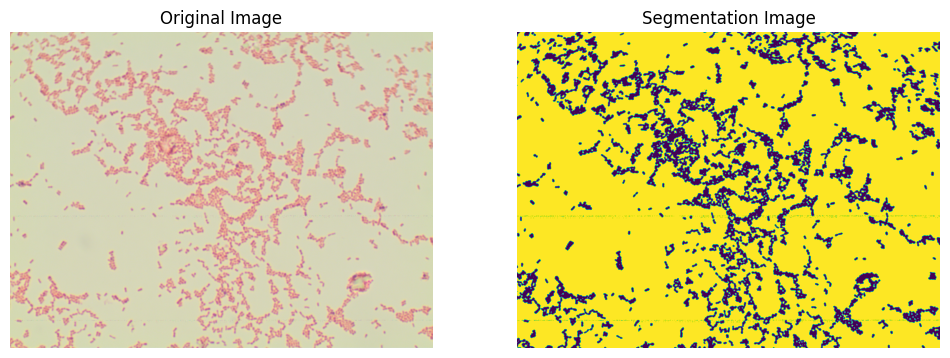

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# הגדרת נתיבי התמונות
image_path1 = '/content/drive/MyDrive/Part_B/Datset3/Learn/Acinetobacter.baumanii/Acinetobacter.baumanii_0001.tif'
image_path2 = '/content/drive/MyDrive/Part_B/Datset3/Learn/Acinetobacter.baumanii/Acinetobacter.baumanii_0001_segmentation.tif'

# טעינת התמונות
img1 = mpimg.imread(image_path1)
img2 = mpimg.imread(image_path2)

# יצירת פיגורה וצירי subplot
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 1 שורה, 2 עמודות, גודל הפיגורה

# הצגת התמונה הראשונה עם כותרת
axes[0].imshow(img1)
axes[0].set_title('Original Image')
axes[0].axis('off')  # הסרת צירי ה-X וה-Y

# הצגת התמונה השנייה עם כותרת
axes[1].imshow(img2)
axes[1].set_title('Segmentation Image')
axes[1].axis('off')  # הסרת צירי ה-X וה-Y

plt.show()


